In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

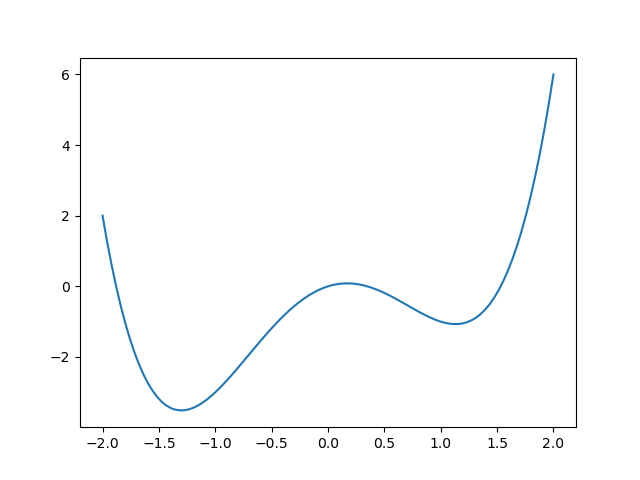

In [10]:

# Fucntion definition to be taken as input by the function
def funcin(x):
    return x**4 - 3*x**2 + 1*x 

# Derivative definition to be taken as input by the program
def funcind(x):
    return 4*x**3 -6*x + 1

# Set up some large value for the best cost found so far
bestcost = 100000

# Defining parameters fro the graph region
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Defining a functiont update the plot according to the frames being passed to it, This uses global variables funcd and func as the derivative anf the function respectively
def onestepderiv(frame):
    
    global bestcost, bestx, lr
    x = bestx - funcd(bestx) * lr 
    bestx = x
    y = func(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,


def Plot_grad(Eqn,derivative,start,learning):
    
    global bestx, lr , func , funcd
    func = Eqn
    funcd = derivative
    xbase = np.linspace(-2, 2, 100)
    ybase = func(xbase)
    bestx = start
    plt.plot(xbase, ybase)
    lr = learning

Plot_grad(funcin,funcind,2,0.01)
ani= FuncAnimation(fig, onestepderiv,frames=range(10), interval=1000, repeat=False)
plt.show()





# Defining and pltting the surface

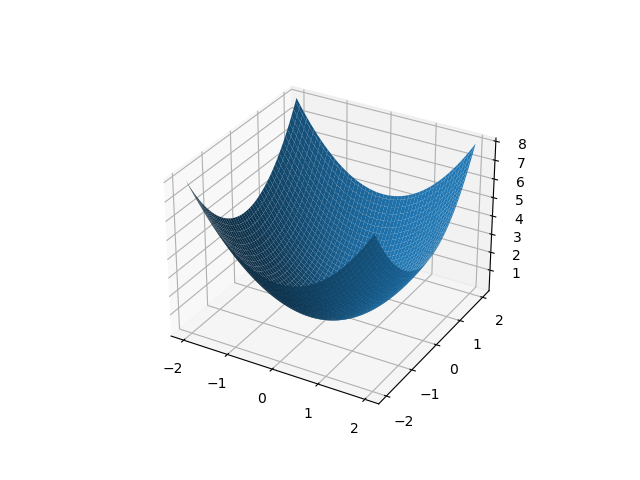

In [21]:

# Defining the funcitons in 2 variables
def func2(x,y):
    return x**2 + y**2

def deriv2(par):
    return [2*par[0],2*par[1]]

xbase = np.linspace(-2,2,100)
ybase = np.linspace(-2,2,100)

X, Y = np.meshgrid(xbase, ybase)

Z = func2(X,Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z )


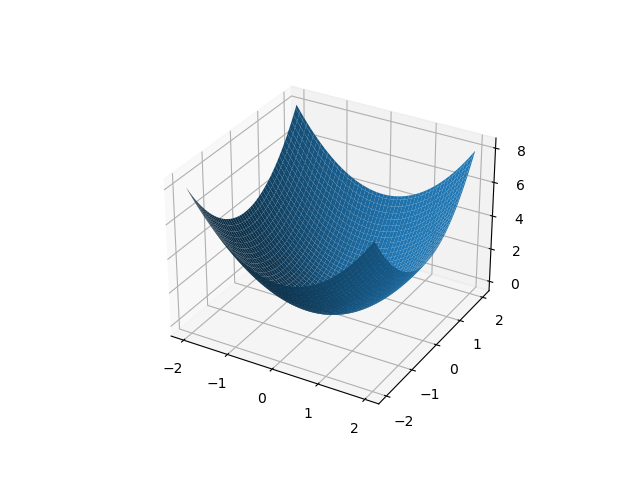

In [22]:
bestx = 1
besty = 1
lr = 0.1
xall, yall ,zall = [], [] ,[]
def onestepderiv2(frame):
    
    global bestx,besty, lr
    x = bestx - deriv2([bestx,besty])[0] * lr
    y = besty - deriv2([bestx,besty])[1] * lr
    bestx = x
    besty = y
    z = func2(x,y)
  
    xall.append(x)
    yall.append(y)
    zall.append(z)
    # lnall.set_data(xall, yall,zall)
    return lngood,\

for i in range(100):
    onestepderiv2(i)
ax.scatter(xall,yall,zall , c='r', marker='o')
#ani= FuncAnimation(fig, onestepderiv2,frames=range(10), interval=1000, repeat=False,blit = True)
plt.show()

In [18]:
best = [1,1]
lr = 0.1

for i in range(100):
    real = best - np.array(deriv2(best))*lr
    best = real

print(real,func2(real[0],real[1]))

[2.03703598e-10 2.03703598e-10] 8.299031137761999e-20


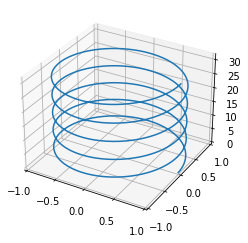

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the x, y, and z data
t = np.linspace(0, 10*np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
z = t

# Create the line plot
line, = ax.plot(x, y, z)

# Define the update function
def update(frame):
    # Shift the x, y, and z data
    line.set_data(np.array([x[frame:], y[frame:]]))
    line.set_3d_properties(z[frame:])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t), interval=50)

# Set the limits for the x, y, and z axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 10*np.pi)

# Show the plot
plt.show()


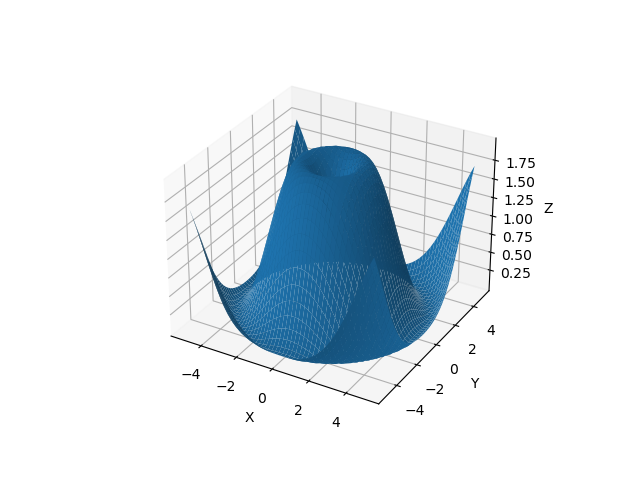

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 2D grid of x and y points
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Define the function that will define the surface
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Evaluate the function over the grid
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z)

# Set the labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


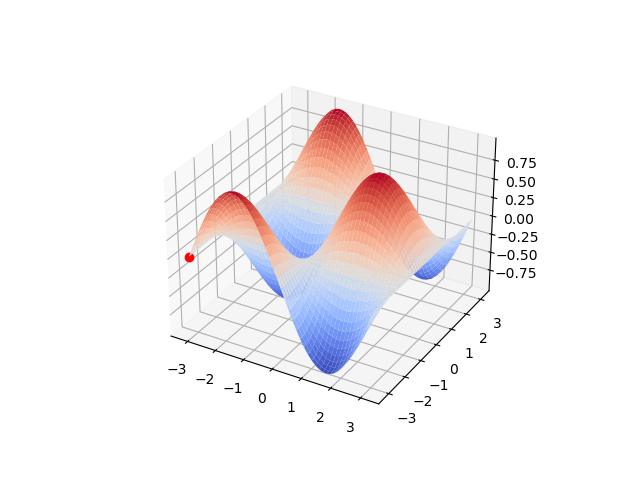

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the function that generates the surface
def surface_function(x, y):
    return np.sin(x) * np.cos(y)

# Generate the surface coordinates
x = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(-np.pi, np.pi, 50)
X, Y = np.meshgrid(x, y)
Z = surface_function(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Define the starting point for the animation
start_point = [x[0], y[0], surface_function(x[0], y[0])]
point, = ax.plot([start_point[0]], [start_point[1]], [start_point[2]], marker='o', color='red')

# Define the animation function
def update(i):
    # Calculate the new point coordinates
    new_point = [x[i], y[i], surface_function(x[i], y[i])]
    # Update the point coordinates in the plot
    point.set_data([new_point[0], new_point[1]])
    point.set_3d_properties(new_point[2], 'z')
    # Return the plot objects that have changed
    return point,

# Animate the plot
ani = FuncAnimation(fig, update, frames=len(x) , interval =500, blit=True)

# Show the plot
plt.show()
